# Data was taken from github

In [2]:
import pandas as pd

# link to the GitHub CSV file
data_url = 'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_confirmed.csv'

# read data from the URL as a pandas dataframe
covid_data = pd.read_csv(data_url)

# display the first 3 rows of the dataset
print(covid_data.head(2))


ModuleNotFoundError: No module named 'pandas'

## Cleaned Data to a new CSV file

In [ ]:
import pandas as pd

# Load the data from the GitHub URL
df = pd.read_csv('https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_confirmed.csv')

# Function to fill missing values with the average of previous and next values
def fill_missing_with_avg(series):
    for i in range(1, len(series) - 1):
        if pd.isna(series[i]):
            prev_value = series[i - 1]
            next_value = series[i + 1]
            # Check that both previous and next values are not NaN
            if pd.notna(prev_value) and pd.notna(next_value):
                series[i] = (prev_value + next_value) / 2
    # Handle missing values at the start or end by forward and backward filling
    return series.ffill().bfill()

# Apply the function to the numeric columns only
df_cleaned = df.apply(lambda col: fill_missing_with_avg(col).round() if col.dtype in ['float64', 'int64'] else col)

# Specify the output file name
output_file = 'cleaned_covid19za_provincial_cumulative_timeline_confirmed.csv'

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv(output_file, index=False)

print(f"Cleaned data saved to {output_file}")

# Display the first few rows of the cleaned DataFrame
df_cleaned.head(2)


Cleaned data saved to cleaned_covid19za_provincial_cumulative_timeline_confirmed.csv


,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
0,05-03-2020,20200305,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,07-03-2020,20200307,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,NaN


In [ ]:
# Load the data from the GitHub URL
df = pd.read_csv('cleaned_covid19za_provincial_cumulative_timeline_confirmed.csv')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Filter data for specific dates
specific_dates = ['2020-03-27', '2020-04-04']
filtered_data = df[df['date'].isin(pd.to_datetime(specific_dates))]

# Display the filtered data
filtered_data


,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
20,2020-03-27,20200327,8.0,58.0,471.0,145.0,8.0,10.0,4.0,6.0,250.0,98.0,1170,NaN
28,2020-04-04,20200404,25.0,85.0,693.0,232.0,18.0,18.0,7.0,11.0,433.0,63.0,1585,NaN


In [ ]:
# Load the cleaned CSV file
df = pd.read_csv('cleaned_covid19za_provincial_cumulative_timeline_confirmed.csv')

# Convert the 'YYYYMMDD' column to datetime format
df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')

# Extract only the 'YYYYMMDD' and 'GP' (Gauteng) columns
df_extracted = df[['YYYYMMDD', 'GP']]

# Display the first few rows of the extracted data
print(df_extracted.tail())


      YYYYMMDD         GP
859 2022-07-19  1324070.0
860 2022-07-20  1324332.0
861 2022-07-21  1324474.0
862 2022-07-22  1324602.0
863 2022-07-25  1324948.0


## Cumulative Plot for GP

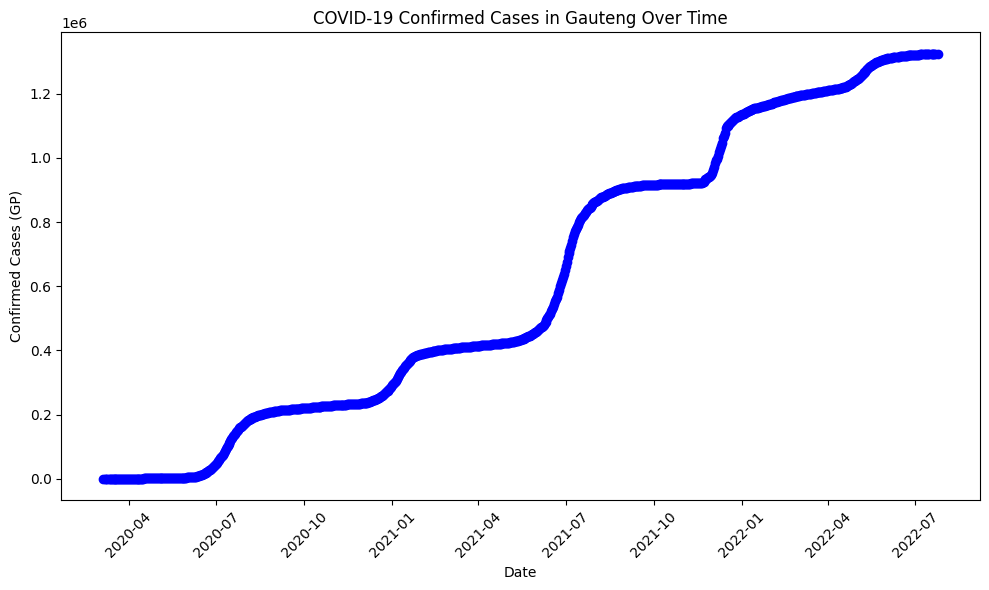

In [ ]:
import matplotlib.pyplot as plt
# Load the cleaned CSV file
df = pd.read_csv('cleaned_covid19za_provincial_cumulative_timeline_confirmed.csv')

# Convert the 'YYYYMMDD' column to datetime format
df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')

# Extract only the 'YYYYMMDD' and 'GP' (Gauteng) columns
df_extracted = df[['YYYYMMDD', 'GP']]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_extracted['YYYYMMDD'], df_extracted['GP'], marker='o', linestyle='-', color='b')

# Set plot title and labels
plt.title('COVID-19 Confirmed Cases in Gauteng Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (GP)')
plt.grid(False)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Cumulative Plot for GP (June 2021 - December 2021)

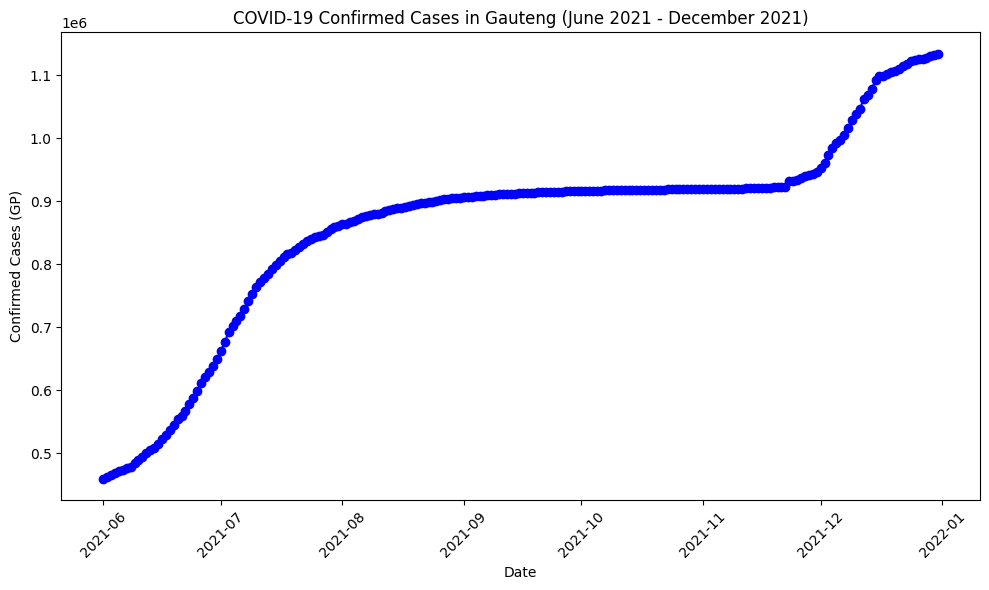

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned CSV file
df = pd.read_csv('cleaned_covid19za_provincial_cumulative_timeline_confirmed.csv')

# Convert the 'YYYYMMDD' column to datetime format
df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')

# Define the start and end dates for filtering
start_date = '2021-06-01'
end_date = '2021-12-31'

# Filter the data for the specified date range
df_filtered = df[(df['YYYYMMDD'] >= start_date) & (df['YYYYMMDD'] <= end_date)]

# Extract only the 'YYYYMMDD' and 'GP' (Gauteng) columns
df_extracted = df_filtered[['YYYYMMDD', 'GP']]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_extracted['YYYYMMDD'], df_extracted['GP'], marker='o', linestyle='-', color='b')

# Set plot title and labels
plt.title('COVID-19 Confirmed Cases in Gauteng (June 2021 - December 2021)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (GP)')
plt.grid(False)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the cleaned CSV file
df = pd.read_csv('cleaned_covid19za_provincial_cumulative_timeline_confirmed.csv')

# Convert the 'YYYYMMDD' column to datetime format
df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')

# Define the start and end dates for filtering
start_date = '2021-06-01'
end_date = '2021-12-31'

# Filter the data for the specified date range
df_filtered = df[(df['YYYYMMDD'] >= start_date) & (df['YYYYMMDD'] <= end_date)]

# Extract only the 'YYYYMMDD' and 'GP' (Gauteng) columns
df_extracted = df_filtered[['YYYYMMDD', 'GP']].copy()

# Calculate the frequency of new cases
df_extracted.loc[:, 'Frequency'] = df_extracted['GP'].diff().fillna(0).astype(int)

# Reorder columns
df_extracted = df_extracted[['YYYYMMDD', 'Frequency', 'GP']]

# Reset index and start from 1
df_extracted.reset_index(drop=True, inplace=True)
df_extracted.index = df_extracted.index + 1

# Display the first few rows of the DataFrame with the frequency column
print(df_extracted.head())


    YYYYMMDD  Frequency        GP
1 2021-06-01          0  459911.0
2 2021-06-02       2992  462903.0
3 2021-06-03       2765  465668.0
4 2021-06-04       2986  468654.0
5 2021-06-05       2959  471613.0


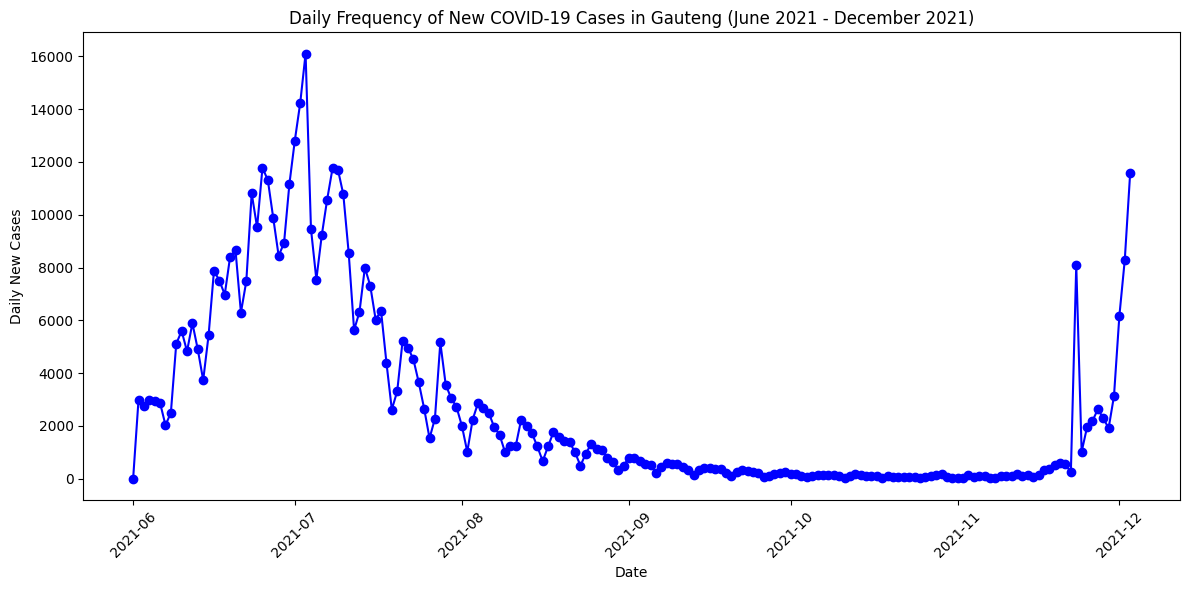

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned CSV file
df = pd.read_csv('cleaned_covid19za_provincial_cumulative_timeline_confirmed.csv')

# Convert the 'YYYYMMDD' column to datetime format
df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')

# Define the start and end dates for filtering
start_date = '2021-06-01'
end_date = '2021-12-3'

# Filter the data for the specified date range
df_filtered = df[(df['YYYYMMDD'] >= start_date) & (df['YYYYMMDD'] <= end_date)]

# Extract only the 'YYYYMMDD' and 'GP' (Gauteng) columns
df_extracted = df_filtered[['YYYYMMDD', 'GP']].copy()

# Calculate the frequency of new cases
df_extracted.loc[:, 'Frequency'] = df_extracted['GP'].diff().fillna(0).astype(int)

# Reorder columns
df_extracted = df_extracted[['YYYYMMDD', 'Frequency', 'GP']]

# Reset index and start from 1
df_extracted.reset_index(drop=True, inplace=True)
df_extracted.index = df_extracted.index + 1

# Plot the daily frequency of new cases
plt.figure(figsize=(12, 6))
plt.plot(df_extracted['YYYYMMDD'], df_extracted['Frequency'], marker='o', linestyle='-', color='b')

# Set plot title and labels
plt.title('Daily Frequency of New COVID-19 Cases in Gauteng (June 2021 - December 2021)')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.grid(False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import pandas as pd

# Load the cleaned CSV file
df = pd.read_csv('cleaned_covid19za_provincial_cumulative_timeline_confirmed.csv')

# Convert the 'YYYYMMDD' column to datetime format
df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')

# Define the start and end dates for filtering
start_date = '2021-06-01'
end_date = '2021-12-31'

# Filter the data for the specified date range
df_filtered = df[(df['YYYYMMDD'] >= start_date) & (df['YYYYMMDD'] <= end_date)]

# Extract only the 'YYYYMMDD' and 'GP' (Gauteng) columns
df_extracted = df_filtered[['YYYYMMDD', 'GP']].copy()

# Calculate the frequency of new cases
df_extracted.loc[:, 'Frequency'] = df_extracted['GP'].diff().fillna(0).astype(int)

# Reorder columns
df_extracted = df_extracted[['YYYYMMDD', 'Frequency', 'GP']]

# Reset index and start from 1
df_extracted.reset_index(drop=True, inplace=True)
df_extracted.index = df_extracted.index + 1

# Save the DataFrame to a CSV file
df_extracted.to_csv('filtered_gauteng_covid19_data.csv', index=False)


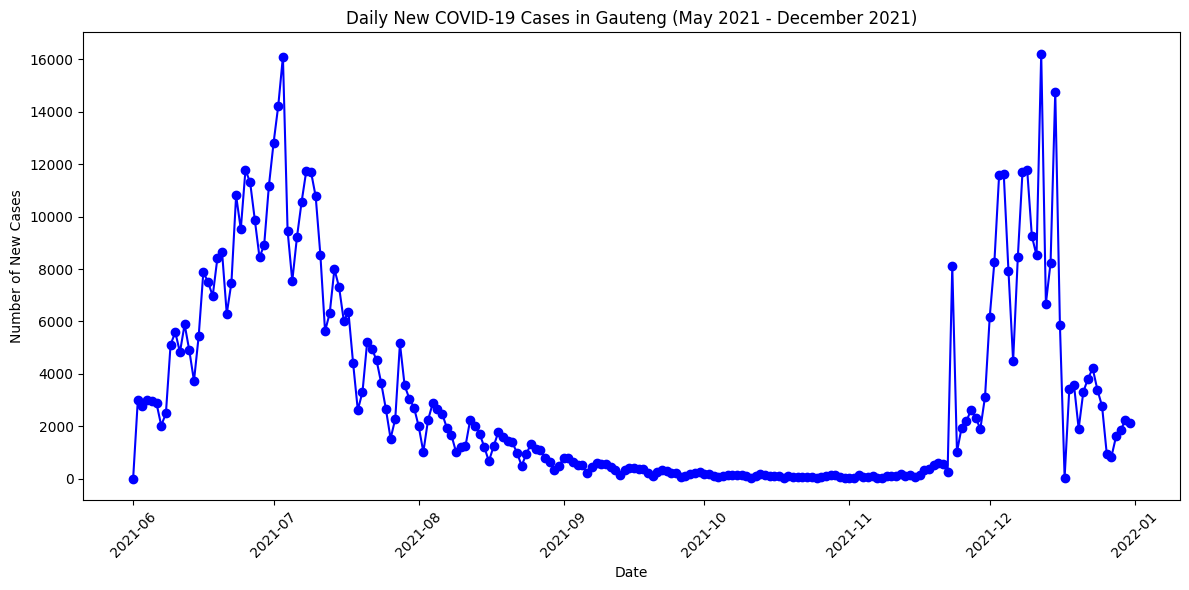

In [ ]:
# Load the filtered CSV file
df_extracted = pd.read_csv('filtered_gauteng_covid19_data.csv')         # New csv file

# Convert the 'YYYYMMDD' column to datetime format
df_extracted['YYYYMMDD'] = pd.to_datetime(df_extracted['YYYYMMDD'], format='%Y-%m-%d')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_extracted['YYYYMMDD'], df_extracted['Frequency'], marker='o', linestyle='-', color='b')
plt.title('Daily New COVID-19 Cases in Gauteng (May 2021 - December 2021)')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Cumulative Total of Infected Individuals
𝐼
(
𝑡
)
I(t):

In [ ]:
# Calculate the total number of newly infected individuals (cumulative sum of Frequency)
df_extracted['Cumulative_Infected'] = df_extracted['Frequency'].cumsum()

# Now df_extracted['Cumulative_Infected'] represents I(t)
# Display the updated dataframe with Cumulative Infected column
print(df_extracted.tail())

      YYYYMMDD  Frequency         GP  Cumulative_Infected
209 2021-12-27        841  1126669.0               666758
210 2021-12-28       1618  1128287.0               668376
211 2021-12-29       1863  1130150.0               670239
212 2021-12-30       2249  1132399.0               672488
213 2021-12-31       2121  1134520.0               674609
